In [15]:
from srcmap import *
from mask import *
from utils_plotting import *
from power_spec import *
from IPython.display import clear_output
import seaborn as sns
sns.set()

In [5]:
inst = 1
make_srcmap_class = make_srcmap(inst, Re2 = 2)

srcmap = make_srcmap_class.run_srcmap(ptsrc=True)
clear_output()

modmap = make_srcmap_class.run_srcmap()
clear_output()

mzmask, _ = MZ14_mask(inst, make_srcmap_class.xls, 
                   make_srcmap_class.yls, make_srcmap_class.ms_inband)
clear_output()

mzmask_mkk = mask_Mkk(mzmask)
mzmask_mkk.get_Mkk_sim(verbose=False)
clear_output()

psfmap = make_srcmap_class.psf_map

In [35]:
l,Cls0,Cls0err = get_power_spec(srcmap, mask=mzmask)
l,Clm0,Clm0err = get_power_spec(modmap, mask=mzmask)
Cls, Clserr = mzmask_mkk.Mkk_correction(Cls0, Clerr=Cls0err)
Clm, Clmerr = mzmask_mkk.Mkk_correction(Clm0, Clerr=Clm0err)
bl = get_bl(psfmap, l)

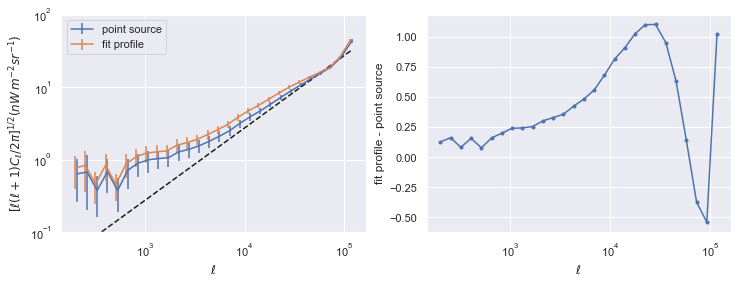

In [24]:
Dls = np.sqrt(Cls*l*(l+1)/2/np.pi/bl)
Dlm = np.sqrt(Clm*l*(l+1)/2/np.pi/bl)
Dlserr = np.sqrt(Clserr*l*(l+1)/2/np.pi/bl)
Dlmerr = np.sqrt(Clserr*l*(l+1)/2/np.pi/bl)
refline = np.sqrt(l*(l+1))
refline /= refline[-4]
refline *= np.sqrt(Cls*l*(l+1)/2/np.pi/bl)[-4]

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].errorbar(l*1.02, Dls, Dlserr, label='point source')
ax[0].errorbar(l*0.98, Dlm, Dlmerr, label='fit profile')
ax[0].plot(l, refline, 'k--')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim([1e-1,1e2])
ax[0].set_xlabel(r'$\ell$')
ax[0].set_ylabel(r'$[ \ell(\ell+1)C_\ell/2\pi ]^{1/2}( nW\,m^{-2} sr^{-1})$')
ax[0].legend()

ax[1].semilogx(l, Dlm - Dls, '.-')
ax[1].set_xlabel(r'$\ell$')
ax[1].set_ylabel('fit profile - point source')
plt.savefig('plots/TM%d/excess_power_spec.png'%inst, dpi = 150, bbox_inches='tight')

***

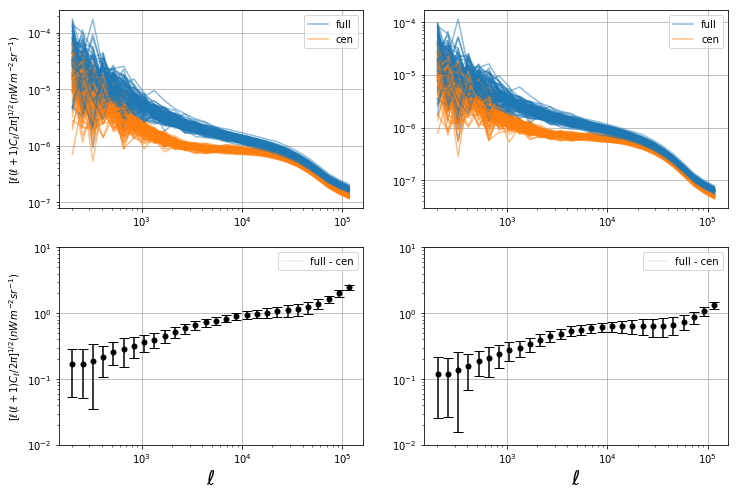

In [241]:
from PS_1h_test import *
# for ibatch in range(9):
#     run_1h_power_spec_test(ibatch)

fig, ax = plt.subplots(2,2, figsize=(12,8))

for i,inst in enumerate([1,2]):
    Dl_all = []
    for ibatch in range(9):
        fname = 'micecat_data/PS1h_test_ibatch%d.pkl'%(ibatch)
        with open(fname, "rb") as f:
            data = pickle.load(f)

        for j,icat in enumerate(list(data)):
            if isinstance(icat, str):
                continue
            Dlf = data[icat]['full'][inst]['Dl']
            Dlc = data[icat]['cen'][inst]['Dl']
            Clf = Dlf**2 * 2 * np.pi / l / (l+1)
            Clc = Dlc**2 * 2 * np.pi / l / (l+1)
            ax[0][i].loglog(l, Clf,'C0',label='full',alpha=0.5)
            ax[0][i].loglog(l, Clc,'C1',label='cen',alpha=0.5)
            ax[1][i].loglog(l, Clf-Clc,'C0',label='full - cen',alpha=0.1)
            
            Dl_all.append(Dlf-Dlc)
            if ibatch==0 and j==0:
                ax[0][i].legend()
                ax[1][i].legend()
                ax[0][i].grid()
                ax[1][i].grid()
                
    ax[1][i].errorbar(l,np.mean(np.array(Dl_all), axis=0), 
                      np.std(np.array(Dl_all), axis=0), fmt='.', capsize=5, markersize=10,c='k')
ax[1][0].set_xlabel(r'$\ell$',fontsize=20)
ax[1][1].set_xlabel(r'$\ell$',fontsize=20)
# ax[0][0].set_ylim([1e-1,1e2])
# ax[0][1].set_ylim([1e-1,1e2])
ax[1][0].set_ylim([1e-2,1e1])
ax[1][1].set_ylim([1e-2,1e1])
ax[0][0].set_ylabel(r'$[ \ell(\ell+1)C_\ell/2\pi ]^{1/2}( nW\,m^{-2} sr^{-1})$',fontsize=10)
ax[1][0].set_ylabel(r'$[ \ell(\ell+1)C_\ell/2\pi ]^{1/2}( nW\,m^{-2} sr^{-1})$',fontsize=10)
plt.savefig('/Users/ytcheng/Desktop/PS_sat_test.png',dpi = 150, bbox_inches='tight')

In [ ]:
run_1h_power_spec_test(0-2,m_max_vega=16)
run_1h_power_spec_test(0-2,m_max_vega=17)
run_1h_power_spec_test(0-2,m_max_vega=18)

In [44]:
data = run_1h_power_spec_test(0,m_max_vega=14.3, mag_th_psf = 16)

icat 0
MICECAT field 0, 0 < ra < 2, 0 < dec < 2
Calculate residual flux of masked sources 0 / 6 (0.0 %),t = 0.00 min
Calculate residual flux of masked sources 1 / 6 (16.7 %),t = 0.05 min
Calculate residual flux of masked sources 2 / 6 (33.3 %),t = 0.10 min
Calculate residual flux of masked sources 3 / 6 (50.0 %),t = 0.15 min
Calculate residual flux of masked sources 4 / 6 (66.7 %),t = 0.20 min
Calculate residual flux of masked sources 5 / 6 (83.3 %),t = 0.25 min
making mask for full
get mkk for full
making srcmap for full TM 1
making srcmap for full TM 2
making srcmap for cen TM 1
making srcmap for cen TM 2


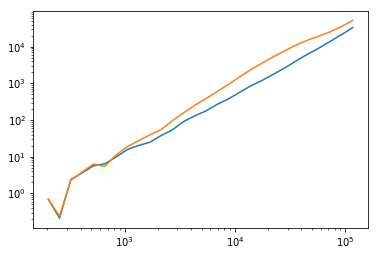

In [46]:
plt.loglog(data['l'],data['l']**2*data[0]['full'][1]['Cl'])
plt.loglog(data['l'],data['l']**2*data[0]['cen'][1]['Cl'])

In [43]:
def run_1h_power_spec_test(ibatch, m_max_vega=17, mag_th_psf = 20):
    batch_size = 10
    icat_arr = np.linspace(0, batch_size-1, batch_size) + ibatch*batch_size
    icat_arr = icat_arr.astype(int)

    mag_th = m_max_vega - 2.5*np.log10(1594./3631.)
    make_srcmap_class1 = make_srcmap(1)
    make_srcmap_class2 = make_srcmap(2)

    data = {'icat_arr':icat_arr}
    for icat in icat_arr:
        print('icat %d'%icat)
        data[icat] = {}
        df = get_micecat_df(icat)
        df['Fnu_I'] = 3631 * 10**(-df['I'] / 2.5)
        df['Fnu_H'] = 3631 * 10**(-df['H'] / 2.5)
        nuFnu_I = np.array(make_srcmap_class1._ABmag2Iciber(df['I'].copy()))
        nuFnu_H = np.array(make_srcmap_class2._ABmag2Iciber(df['H'].copy()))
        idx_b = np.where(df['I'] < mag_th)[0]
        f_res1,f_res2 = np.ones(len(df)),np.ones(len(df))
        
        start_time = time.time()
        for i,idx in enumerate(idx_b):
            if i%(len(idx_b)//100)==0:
                print('Calculate residual flux of masked sources %d / %d (%.1f %%),t = %.2f min'\
                      %(i, len(idx_b), i/len(idx_b)*100, (time.time()-start_time)/60))
            dfi = df.iloc[idx]
            mask,_ = MZ14_mask(1,np.array([dfi['x']]),np.array([dfi['y']]),
                                 np.array([dfi['I']]),m_max_vega=m_max_vega,verbose=True)
            make_srcmap_class1.ms = np.array([dfi['I']])
            make_srcmap_class1.xls = np.array([dfi['x']])
            make_srcmap_class1.yls = np.array([dfi['y']])
            make_srcmap_class2.ms = np.array([dfi['I']])
            make_srcmap_class2.xls = np.array([dfi['x']])
            make_srcmap_class2.yls = np.array([dfi['y']])
            make_srcmap_class1.ms_inband = np.array([dfi['I']])
            make_srcmap_class2.ms_inband = np.array([dfi['H']])

            srcmapb1 = make_srcmap_class1.run_srcmap(ptsrc=True, verbose=False)
            srcmapb2 = make_srcmap_class2.run_srcmap(ptsrc=True, verbose=False)
            f_res1[idx] = np.sum(srcmapb1[mask==1]) / nuFnu_I[idx]
            f_res2[idx] = np.sum(srcmapb2[mask==1]) / nuFnu_H[idx]

        df['Fnu_I_res'] = df['Fnu_I'].copy() * f_res1
        df['Fnu_H_res'] = df['Fnu_H'].copy() * f_res2        
        dfc = df.loc[df['flag_central']==0]
        dfsum = df.groupby('unique_halo_id')[['Fnu_I_res','Fnu_H_res']].sum()
        dfsum.rename(columns={'Fnu_I_res':'Fnu_I_res_sum','Fnu_H_res':'Fnu_H_res_sum'}, inplace=True)
        dfc = dfc.join(dfsum, on='unique_halo_id', how='inner')
        dfc['I'] = -2.5 * np.log10(dfc['Fnu_I_res_sum']/3631)
        dfc['H'] = -2.5 * np.log10(dfc['Fnu_H_res_sum']/3631) 
        
        for i,(name,dfi) in enumerate(zip(['full','cen'],[df,dfc])):
            data[icat][name] = {}
            xs, ys, ms = np.array(dfi['x']), np.array(dfi['y']), np.array(dfi['I'])
            
            if name == 'full':
                print('making mask for %s'%name)
                mask,num = MZ14_mask(1,xs,ys,ms,m_max_vega=m_max_vega,verbose=False)

                print('get mkk for %s'%name)
                mask_mkk = mask_Mkk(mask)
                mask_mkk.get_Mkk_sim(Nsims=10,verbose=False)

            spb = np.where(dfi['I']<=mag_th_psf)[0]
            spf = np.where(dfi['I']>mag_th_psf)[0]
            for inst in [1,2]:
                data[icat][name][inst] = {}
                ms_inband = np.array(dfi['I']) if inst==1 else np.array(dfi['H'])

                print('making srcmap for %s TM %d'%(name,inst))
                make_srcmap_class = make_srcmap(inst)

                make_srcmap_class.ms = ms[spb]
                make_srcmap_class.ms_inband = ms_inband[spb]
                make_srcmap_class.xls = xs[spb]
                make_srcmap_class.yls = ys[spb]
                srcmapb = make_srcmap_class.run_srcmap(ptsrc=True, verbose=False)

                make_srcmap_class.ms = ms[spf]
                make_srcmap_class.ms_inband = ms[spf]
                make_srcmap_class.xls = xs[spf]
                make_srcmap_class.yls = ys[spf]
                srcmapf = make_srcmap_class.run_srcmap_nopsf()
                srcmap = srcmapb + srcmapf

                if name == 'cen':
                    l,Cl,Clerr = get_power_spec(srcmap)
                else:
                    l,Cl0,Cl0err = get_power_spec(srcmap, mask=mask)
                    Cl, Clerr = mask_mkk.Mkk_correction(Cl0, Clerr=Cl0err)
                
                data[icat][name][inst]['Cl'] = Cl
                data[icat][name][inst]['Clerr'] = Clerr
                    
        data['l'] = l 
        fname = 'micecat_data/PS1h_test_ibatch%d_maskth%d.pkl'%(ibatch,m_max_vega)
        with open(fname, "wb") as f:
            pickle.dump(data , f)

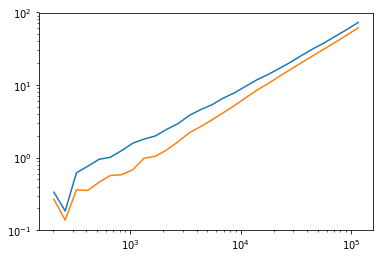

In [27]:

plt.loglog(data[0]['full'][1]['l'],data[0]['full'][1]['Dl'])
plt.loglog(data[0]['full'][1]['l'],data[0]['cen'][1]['Dl'])